<a href="https://colab.research.google.com/github/RAGILSAPUTRI/AI_TUGAS/blob/main/DigitRecognizer_with_CNN__RAGIL_SAPUTRI_DATA_SCIENCE2_BENER_SETENGAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


#Transformasi Data (Data Transformation)
1. Normalisasi & Reshape

In [ ]:
y_train  = df_train['label'].values # np array of all the labels (42000, )
X_train = df_train.drop(columns=['label']).values.reshape(-1,28,28,1)/255.0 # drop the labels and reshape (num_rows, height , width , channel)
X_test = df_test.values.reshape(-1, 28, 28, 1) / 255.0 # /255.0 --> ormalizing these pixel values to the range [0, 1]

#Encoding

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Data Visualisasi
 📊</p>



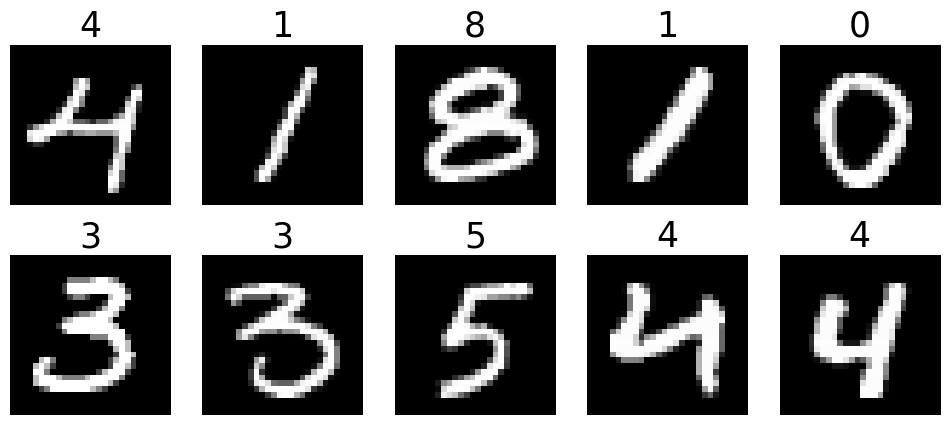

In [ ]:
fig , axes  = plt.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
plt.show()

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> Model ⚖️</p>


#Arsitektur Model

In [ ]:
model = models.Sequential([

    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=192, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=192, kernel_size=5, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),

    layers.Flatten(),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 192)      │       921,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,191,434 (8.36 MB)

 Trainable params: 2,191,434 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

#SPLIT DATA & Teknik Pelatihan dan Validasi & Metrik Evaluasi


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)

history = model.fit(
    X_train, y_train_encoded,
    epochs=25,
    validation_split=0.1,
    callbacks=[reduce_lr],
)

Epoch 1/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1099s 926ms/step - accuracy: 0.8832 - loss: 0.3539 - val_accuracy: 0.9864 - val_loss: 0.0480 - learning_rate: 0.0010
Epoch 2/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1096s 921ms/step - accuracy: 0.9866 - loss: 0.0434 - val_accuracy: 0.9831 - val_loss: 0.0537 - learning_rate: 0.0010
Epoch 3/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1111s 928ms/step - accuracy: 0.9899 - loss: 0.0339 - val_accuracy: 0.9900 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 4/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1095s 926ms/step - accuracy: 0.9939 - loss: 0.0212 - val_accuracy: 0.9874 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 5/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1096s 921ms/step - accuracy: 0.9942 - loss: 0.0200 - val_accuracy: 0.9898 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 6/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1095s 915ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9936 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 7/25
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1083

#FUNGSI LOSS

<Axes: >

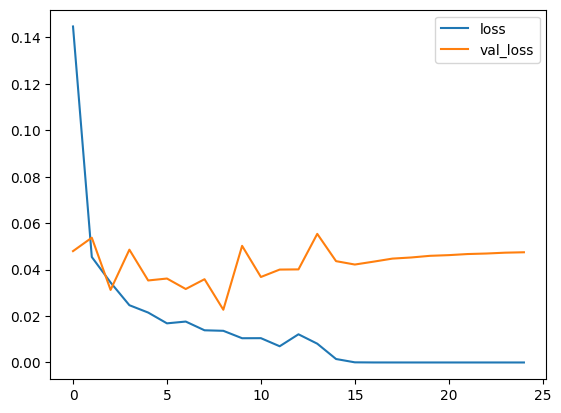

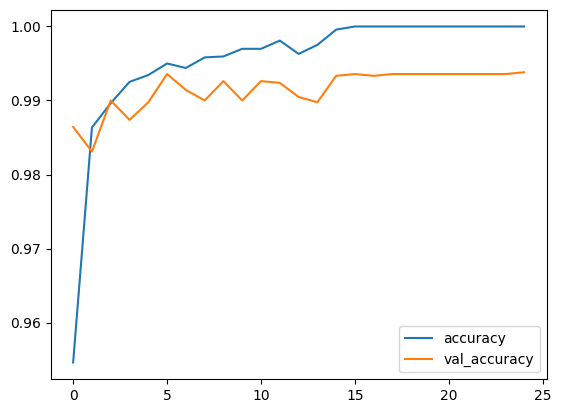

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[: , ['loss', 'val_loss']].plot()
history_frame.loc[: , ['accuracy', 'val_accuracy']].plot()

In [ ]:
# Make predictions for competition submission
predictions = model.predict(X_test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 204s 233ms/step


In [ ]:
predictions

array([[4.5742237e-34, 1.6145765e-37, 9.9999994e-01, ..., 2.5103585e-37,
        5.9207365e-31, 0.0000000e+00],
       [9.9999994e-01, 2.4664655e-30, 1.8446916e-30, ..., 2.0460988e-22,
        8.4162638e-28, 1.3464765e-26],
       [3.9866549e-17, 2.2809105e-20, 8.1452294e-20, ..., 9.5682869e-13,
        1.0450128e-15, 9.9999994e-01],
       ...,
       [0.0000000e+00, 4.8009875e-36, 0.0000000e+00, ..., 0.0000000e+00,
        2.7700442e-38, 0.0000000e+00],
       [3.4086627e-19, 9.3939940e-22, 3.7629496e-22, ..., 1.3333244e-12,
        3.2909232e-18, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# Convert the model's probability outputs to digit predictions
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_labels) + 1),  # ImageId starts from 1
    "Label": predicted_labels
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [ ]:
# Menyimpan model dalam format .h5
model.save('model_digit_recognizer.h5')
print("Model berhasil disimpan.")


Model berhasil disimpan.


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Memuat model yang sudah disimpan
model = load_model('model_digit_recognizer.h5')
print("Model berhasil dimuat.")


Model berhasil dimuat.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


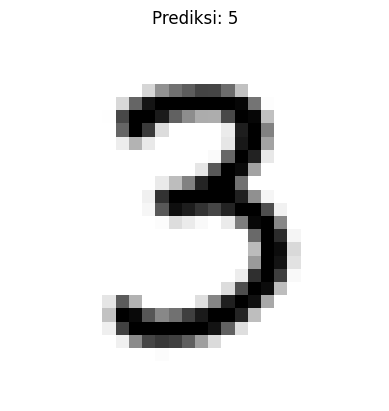

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'angka_3.png'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


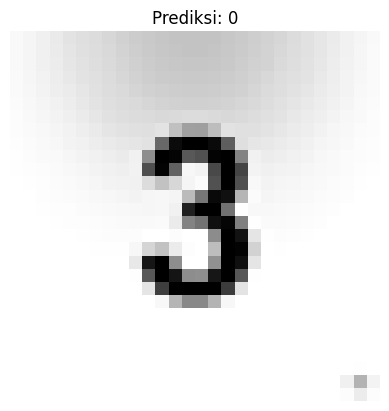

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'angka_3.2.png'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


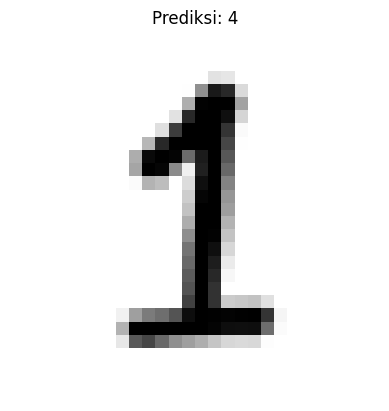

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'angka_1.png'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


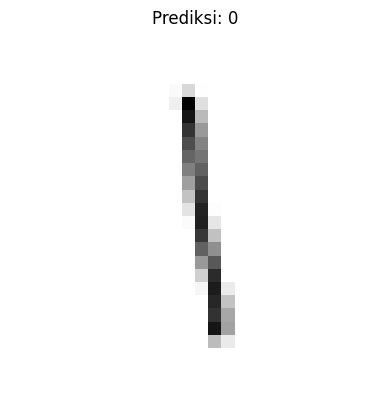

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


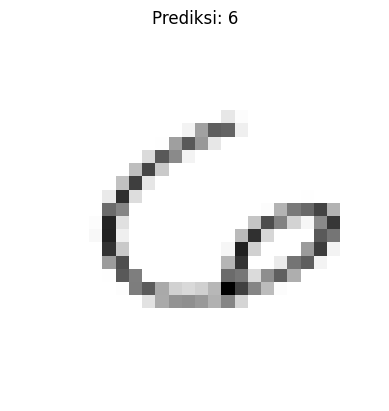

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_6.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


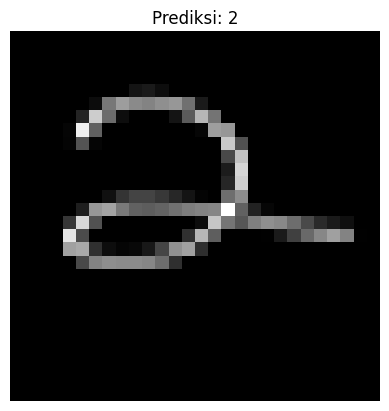

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_2.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


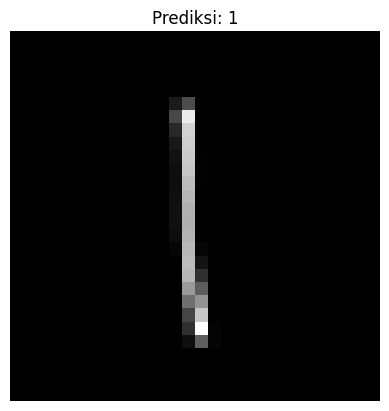

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_1_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


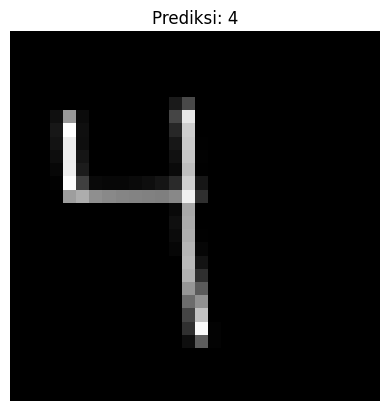

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_4_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


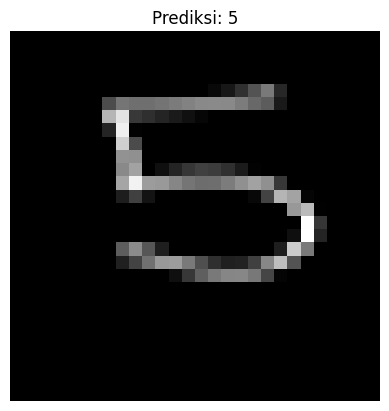

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_5_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


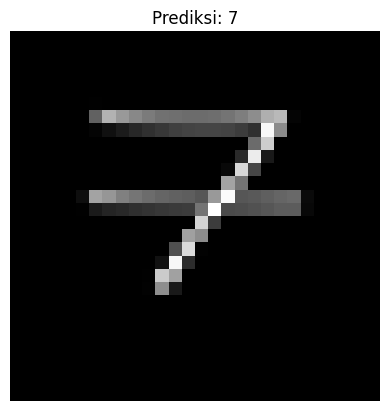

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_7_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


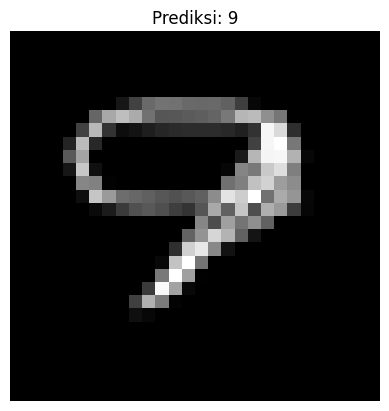

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_9_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


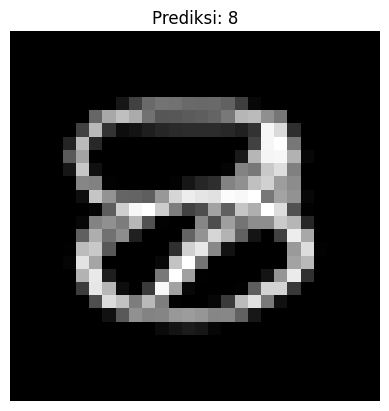

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_8_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


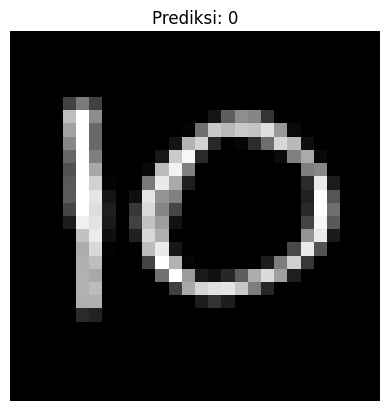

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_10_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


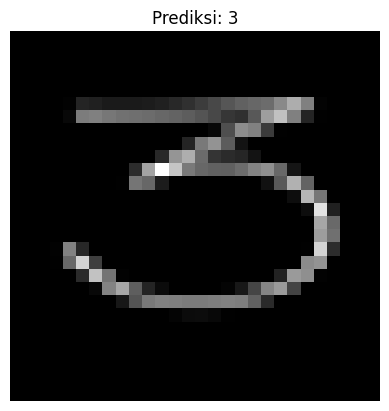

In [ ]:
# Membaca gambar (pastikan 28x28 piksel dan grayscale)
image_path = 'Angka_3_bl.jpg'  # Ganti dengan nama file gambar kamu
img = Image.open(image_path).convert('L')  # Convert ke grayscale
img = img.resize((28, 28))  # Resize ke 28x28
img_array = np.array(img)

# Invers warna jika background putih (optional, tergantung gambar)
img_array = 255 - img_array

# Normalisasi dan ubah bentuk
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()
